In [1]:
import torch
from torch.nn import MSELoss
import matplotlib.pyplot as plt

class model:
    def __init__(self,inputs_shape , hidden_shape ,output_shape):
        self.w1 = torch.randn(inputs_shape, hidden_shape, requires_grad=True)
        self.w2 = torch.randn(hidden_shape, output_shape, requires_grad=True)
        
        self.b1 = torch.randn(1,hidden_shape, requires_grad=True)
        self.b2 = torch.randn(1,output_shape, requires_grad=True)
        self.loss = []
        self.mse = MSELoss()
        

    def fit(self, x, y , lr=0.2, epoch=200):
        for i in range(epoch):
            output = self.forward(x)
            loss = self.mse(output, y)
            self.loss.append(float(loss))
            self.updata(loss,lr)
            
    
    
    def updata(self, loss, lr):
        loss.backward()
        with torch.no_grad():
            self.w1 -= self.w1.grad * lr            
            self.w2 -= self.w2.grad * lr
            
            self.b2 -= self.b2.grad * lr
            self.b1 -= self.b1.grad * lr


            self.w1.grad.zero_()
            self.w2.grad.zero_()

            self.b1.grad.zero_()
            self.b2.grad.zero_()
            
    def forward(self,x):
        h = x @ self.w1 + self.b1
        h_out = self.sigmoid(h)
        
        output = h_out @ self.w2 + self.b2
        outpu_fin = self.sigmoid(output)
        
        return outpu_fin
    
    def sigmoid(self, x):
        return 1 / (1 + torch.exp(-x))
    
    def predict(self, x):
        with torch.no_grad():
            return self.forward(x) >= 0.5 
        

    def show(self, title):
        plt.plot(self.loss)
        plt.title(title)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.show()
        
        print(f'第一層W:{self.w1.tolist()} \n第二層W:{self.w2.tolist()} \n第一層?:{self.b1.tolist()} \n第二層?{self.b2.tolist()}')

In [2]:
x = [[0.,0.], [0.,1.], [1.,0.], [1.,1.]]
x = torch.tensor(x)

XOR_y = torch.tensor([[0.], [1.], [1.], [0.]])
AND_y = torch.tensor([[0.], [0.], [0.], [1.]])
OR_y = torch.tensor([[0.], [1.], [1.], [1.]])

XOR_model = model(2, 2, 1)
AND_model = model(2, 2, 1)
OR_model = model(2, 2, 1)

XOR_model.fit(x, XOR_y, 0.2, 5000)
AND_model.fit(x, AND_y,0.2, 5000)
OR_model.fit(x, OR_y,0.2, 5000)

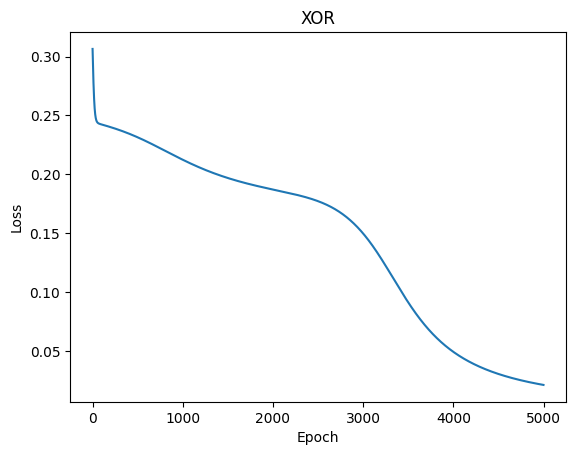

第一層W:[[-3.9148108959198, 5.742833614349365], [4.233150959014893, -5.77683162689209]] 
第二層W:[[-4.781301021575928], [-4.638425350189209]] 
第一層?:[[1.930522084236145, 3.1368603706359863]] 
第二層?[[6.833221435546875]]


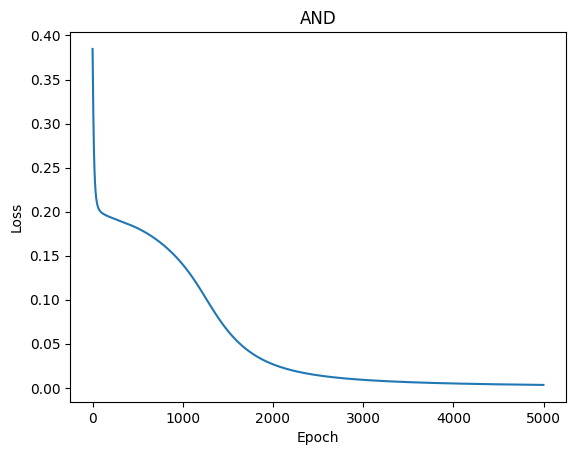

第一層W:[[3.3135437965393066, 1.4585628509521484], [3.498582124710083, 0.32651224732398987]] 
第二層W:[[7.340244293212891], [0.9538944959640503]] 
第一層?:[[-5.014938831329346, -0.7481724619865417]] 
第二層?[[-4.495617866516113]]


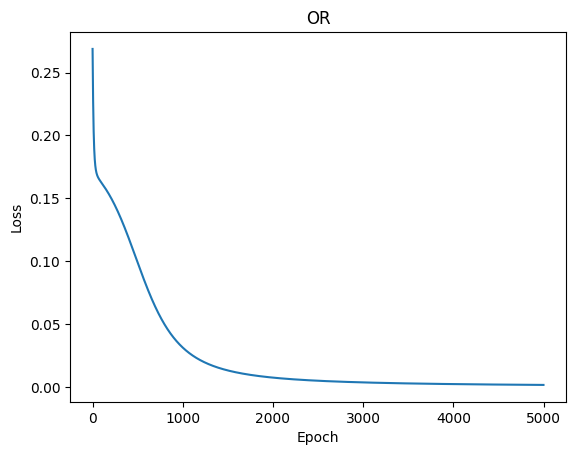

第一層W:[[3.1438097953796387, 3.323018789291382], [3.4834699630737305, 2.9660959243774414]] 
第二層W:[[4.670794486999512], [4.3197479248046875]] 
第一層?:[[-1.8352158069610596, -1.7564866542816162]] 
第二層?[[-3.9476542472839355]]


In [3]:
XOR_model.show('XOR')
AND_model.show('AND')
OR_model.show('OR')

In [4]:
print(XOR_model.predict(x),AND_model.predict(x),OR_model.predict(x),sep='\n\n')

tensor([[False],
        [ True],
        [ True],
        [False]])

tensor([[False],
        [False],
        [False],
        [ True]])

tensor([[False],
        [ True],
        [ True],
        [ True]])
